***The data we used was in the form of an array containing the microvolts value which signified the intensity of the brain signals.Here in our project we used preprocessed data that was free from noise and artifacts and also had a paticular bandwith.The project shows how well can neural networks help in predicting the emotion of a person.***

In [45]:
import pandas as pd
import numpy as np
import os
import pickle

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import save_model,Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D,ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2

In [4]:
os.chdir('D:\EEG to emotion\EEG_DE_features')

In [5]:
train=pd.read_csv("seed_2.csv") ##reading the csv file containing all the feature values corresponding to data. 

In [6]:
train

,Unnamed: 0,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,label
0,0,10.356102,8.453970,9.182864,6.004890,5.141894,10.290716,8.406716,9.207439,5.734522,...,7.283657,8.523224,5.003387,2.879170,9.615048,7.721449,8.756285,5.505700,3.557300,4.0
1,1,10.354815,8.453036,9.182566,6.004623,5.141820,10.289452,8.405880,9.207191,5.734266,...,7.283529,8.523248,5.003657,2.879481,9.615013,7.721393,8.756245,5.505755,3.557400,4.0
2,2,10.352640,8.451730,9.182253,6.004298,5.141673,10.287379,8.404652,9.206818,5.733827,...,7.283271,8.523222,5.004054,2.879892,9.614570,7.721243,8.756308,5.505813,3.557577,4.0
3,3,10.350465,8.450617,9.181642,6.004049,5.141211,10.285401,8.403554,9.206070,5.733409,...,7.282900,8.523018,5.004297,2.880240,9.613893,7.721066,8.756528,5.505806,3.557766,4.0
4,4,10.347972,8.448817,9.180328,6.003959,5.140420,10.283218,8.401791,9.204567,5.733128,...,7.282056,8.522784,5.004463,2.880605,9.612883,7.720556,8.756705,5.505800,3.558054,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29163,29163,13.194414,11.056482,8.473696,6.289591,5.224470,13.149945,10.928947,8.334800,6.132802,...,8.695868,6.938516,5.447935,4.017493,9.772625,8.791983,6.961640,5.557422,4.219654,0.0
29164,29164,13.197743,11.059145,8.473367,6.288137,5.224715,13.153941,10.931755,8.334083,6.131203,...,8.696557,6.937651,5.448157,4.018655,9.771082,8.792811,6.960881,5.557415,4.220917,0.0
29165,29165,13.199857,11.060901,8.472648,6.286732,5.224769,13.156656,10.933649,8.333033,6.129622,...,8.697358,6.936938,5.448254,4.019552,9.769717,8.793770,6.960305,5.557380,4.221877,0.0
29166,29166,13.201002,11.062336,8.471964,6.285544,5.224847,13.158314,10.935220,8.332127,6.128232,...,8.698238,6.936632,5.448181,4.020114,9.768685,8.794774,6.960106,5.557252,4.222538,0.0


In [7]:
Y=pd.DataFrame({'label':train['label']},index=None)

In [8]:
Y

,label
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
29163,0.0
29164,0.0
29165,0.0
29166,0.0


In [9]:
train=train.drop(['Unnamed: 0','label'],axis=1)

In [10]:
train

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309
0,10.356102,8.453970,9.182864,6.004890,5.141894,10.290716,8.406716,9.207439,5.734522,4.649539,...,9.172295,7.283657,8.523224,5.003387,2.879170,9.615048,7.721449,8.756285,5.505700,3.557300
1,10.354815,8.453036,9.182566,6.004623,5.141820,10.289452,8.405880,9.207191,5.734266,4.649478,...,9.172635,7.283529,8.523248,5.003657,2.879481,9.615013,7.721393,8.756245,5.505755,3.557400
2,10.352640,8.451730,9.182253,6.004298,5.141673,10.287379,8.404652,9.206818,5.733827,4.649188,...,9.172764,7.283271,8.523222,5.004054,2.879892,9.614570,7.721243,8.756308,5.505813,3.557577
3,10.350465,8.450617,9.181642,6.004049,5.141211,10.285401,8.403554,9.206070,5.733409,4.648416,...,9.172640,7.282900,8.523018,5.004297,2.880240,9.613893,7.721066,8.756528,5.505806,3.557766
4,10.347972,8.448817,9.180328,6.003959,5.140420,10.283218,8.401791,9.204567,5.733128,4.647245,...,9.172215,7.282056,8.522784,5.004463,2.880605,9.612883,7.720556,8.756705,5.505800,3.558054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29163,13.194414,11.056482,8.473696,6.289591,5.224470,13.149945,10.928947,8.334800,6.132802,5.063134,...,9.508677,8.695868,6.938516,5.447935,4.017493,9.772625,8.791983,6.961640,5.557422,4.219654
29164,13.197743,11.059145,8.473367,6.288137,5.224715,13.153941,10.931755,8.334083,6.131203,5.063185,...,9.507238,8.696557,6.937651,5.448157,4.018655,9.771082,8.792811,6.960881,5.557415,4.220917
29165,13.199857,11.060901,8.472648,6.286732,5.224769,13.156656,10.933649,8.333033,6.129622,5.063147,...,9.506012,8.697358,6.936938,5.448254,4.019552,9.769717,8.793770,6.960305,5.557380,4.221877
29166,13.201002,11.062336,8.471964,6.285544,5.224847,13.158314,10.935220,8.332127,6.128232,5.063217,...,9.505125,8.698238,6.936632,5.448181,4.020114,9.768685,8.794774,6.960106,5.557252,4.222538


In [11]:
train['combine'] = train.values.tolist()

In [12]:
for i in range(train['combine'].shape[0]):
    train['combine'][i]=np.asarray(train['combine'][i]) ##merge the data to form an array 

C:\Users\admin\AppData\Local\Temp/ipykernel_12564/935839337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['combine'][i]=np.asarray(train['combine'][i]) ##merge the data to form an array


In [13]:
train['combine'][0].shape

(310,)

In [14]:
data = []
label = []
for i in range(0,train.shape[0]):
    data.append(train['combine'][i])
    label.append(Y['label'][i])

In [15]:
data[779]

array([11.08316931,  9.11230307,  8.87036751,  6.12812323,  5.22943809,
       10.95029702,  8.95368551,  8.8573216 ,  5.60985178,  4.50550432,
       11.16020922,  8.97388329,  8.87081601,  6.11409857,  5.24842547,
       10.21123885,  8.19065702,  8.49868502,  5.37194168,  4.05861066,
        9.94103546,  7.9434142 ,  8.65152316,  5.17852742,  3.9053823 ,
       10.14438824,  8.09226758,  8.09093444,  6.12236536,  5.15566169,
        9.72244869,  7.7813044 ,  7.98252353,  5.41153487,  4.02859096,
        9.27424249,  7.37097092,  7.98493191,  5.02006973,  3.37498946,
        8.60889218,  6.91594338,  8.23824099,  4.55005032,  2.51622033,
        8.43486771,  6.7435913 ,  8.51358217,  4.3797087 ,  2.19792869,
        8.58798891,  6.83115063,  8.55518092,  4.45086166,  2.32584038,
        9.00648965,  7.19315967,  8.39064413,  4.89407251,  3.17720731,
        9.36460949,  7.48843252,  8.17832309,  5.14314385,  3.66246108,
        9.72129731,  7.82877793,  8.15359756,  5.4618162 ,  4.49

In [16]:
new_train=np.asarray(data) 

In [17]:
new_train=new_train.reshape(new_train.shape[0],new_train.shape[1],1) ##reshaping the data to 3D

In [18]:
new_train.shape

(29168, 310, 1)

In [19]:
label_new=np.asarray(label)

In [20]:
label_new.shape

(29168,)

In [21]:
label_new

array([4., 4., 4., ..., 0., 0., 0.])

In [22]:
new_train,label_new=shuffle(new_train,label_new,random_state=123) ##shuffle the array to reduce overfitting.

In [23]:
label_new

array([3., 0., 2., ..., 2., 1., 1.])

In [24]:
unique, counts = np.unique(label_new, return_counts=True)
label_dist = dict(zip(unique, counts))
print(label_dist)

{0.0: 4896, 1.0: 5968, 2.0: 7616, 3.0: 5872, 4.0: 4816}


In [25]:
label_new = to_categorical(label_new)

In [26]:
label_new

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(new_train, label_new, test_size=0.1, random_state=42)

**MODEL 1D CNN**

In [28]:
batch_size = 256
num_classes = 5
epochs = 100
input_shape=(new_train.shape[1], 1)

In [29]:
model = Sequential()
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 310, 128)          512       
                                                                 
 batch_normalization (BatchN  (None, 310, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 155, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 155, 128)          49280     
                                                                 
 batch_normalization_1 (Batc  (None, 155, 128)         512       
 hNormalization)                                                 
                                                        

In [30]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
callbacks = [
             EarlyStopping(patience=2)
]

In [32]:
H = model.fit(x_train,y_train ,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/100
103/103 [==============================] - 65s 605ms/step - loss: 1.6133 - accuracy: 0.2412 - val_loss: 1.6039 - val_accuracy: 0.2739
Epoch 2/100
103/103 [==============================] - 63s 612ms/step - loss: 1.5924 - accuracy: 0.2562 - val_loss: 1.6012 - val_accuracy: 0.2811
Epoch 3/100
103/103 [==============================] - 62s 603ms/step - loss: 1.5764 - accuracy: 0.2574 - val_loss: 1.5499 - val_accuracy: 0.2784
Epoch 4/100
103/103 [==============================] - 62s 601ms/step - loss: 1.5651 - accuracy: 0.2658 - val_loss: 1.5335 - val_accuracy: 0.2959
Epoch 5/100
103/103 [==============================] - 62s 607ms/step - loss: 1.5457 - accuracy: 0.2773 - val_loss: 1.5057 - val_accuracy: 0.3103
Epoch 6/100
103/103 [==============================] - 62s 607ms/step - loss: 1.5156 - accuracy: 0.2944 - val_loss: 1.4270 - val_accuracy: 0.3682
Epoch 7/100
103/103 [==============================] - 63s 609ms/step - loss: 1.4686 - accuracy: 0.3235 - val_loss: 1.6656 -

Epoch 57/100
103/103 [==============================] - 63s 610ms/step - loss: 0.2013 - accuracy: 0.9314 - val_loss: 0.0772 - val_accuracy: 0.9722
Epoch 58/100
103/103 [==============================] - 58s 566ms/step - loss: 0.1700 - accuracy: 0.9407 - val_loss: 0.2443 - val_accuracy: 0.9222
Epoch 59/100
103/103 [==============================] - 52s 507ms/step - loss: 0.1732 - accuracy: 0.9430 - val_loss: 0.1034 - val_accuracy: 0.9681
Epoch 60/100
103/103 [==============================] - 45s 437ms/step - loss: 0.1639 - accuracy: 0.9445 - val_loss: 0.0844 - val_accuracy: 0.9715
Epoch 61/100
103/103 [==============================] - 45s 436ms/step - loss: 0.1700 - accuracy: 0.9411 - val_loss: 0.0776 - val_accuracy: 0.9777
Epoch 62/100
103/103 [==============================] - 46s 444ms/step - loss: 0.1574 - accuracy: 0.9443 - val_loss: 0.0622 - val_accuracy: 0.9835
Epoch 63/100
103/103 [==============================] - 47s 461ms/step - loss: 0.1549 - accuracy: 0.9464 - val_loss: 0

In [33]:
metrics_df = pd.DataFrame(H.history)

In [34]:
metrics_df

,loss,accuracy,val_loss,val_accuracy
0,1.613293,0.241210,1.603872,0.273912
1,1.592370,0.256181,1.601193,0.281111
2,1.576407,0.257438,1.549891,0.278368
3,1.565066,0.265780,1.533529,0.295852
4,1.545693,0.277323,1.505679,0.310250
...,...,...,...,...
95,0.092418,0.968039,0.171414,0.963318
96,0.086268,0.971811,0.026198,0.993486
97,0.082520,0.973372,0.028060,0.995201
98,0.119307,0.962287,0.156895,0.961262


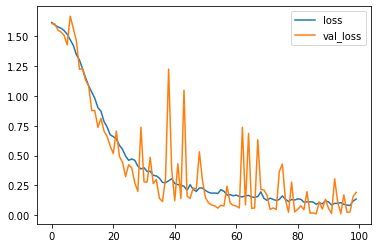

In [35]:
metrics_df[["loss","val_loss"]].plot();

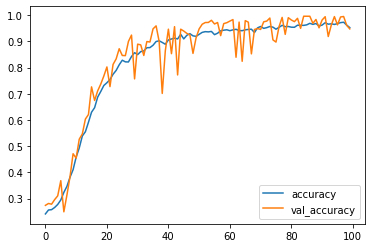

In [36]:
metrics_df[["accuracy","val_accuracy"]].plot();

In [47]:
save_model(model,'1Dcnn.h5')